In [4]:
#Loading all python libraries required for analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import scipy.stats

In [6]:
## Global padding to format numbers in human readable format
pd.options.display.float_format = '{:20,.2f}'.format  

In [7]:
movies_df = pd.read_csv("C:\\Sidd\\VS Code\\archive\\movies_metadata.csv",low_memory=False, header=0) ## creating movies data frame

In [108]:
ratings_df = pd.read_csv("C:\\Sidd\\VS Code\\archive\\ratings.csv",low_memory=False, header=0) ##creating ratings data frame

In [9]:
credits_df = pd.read_csv("C:\\Sidd\\VS Code\\archive\\credits.csv", low_memory=False) ## creating credits data frame

In [10]:
## Data cleanup

In [11]:
## Converting "id" field to Numeric
## Movies dataset - select movies data which has budget more than $10,000
## Select movies data which has data in "Genres" field
## Select movies data which has data in "Production companies" field
## Select movies data which has data in "homepage" field

In [12]:
movies_df["id"] = pd.to_numeric(movies_df["id"]) ##converting id to numeric type
movies_df = movies_df[(movies_df["budget"] > 10000)] ## selecting movies having more than $10,000 budget
## use boolean indexing and filter data which has production companies data. Use string contains "name"
movies_df = movies_df[(movies_df["production_companies"].str.contains("name"))] 
## use boolean indexing and filter data which has production companies data. Use string contains "name"
movies_df = movies_df[(movies_df["genres"].str.contains("name"))] 
## use boolean indexing and filter data which has home page data. Home page will build more trust with users
movies_df = movies_df[(movies_df["homepage"].notnull())]

In [13]:
##Display first 10 modified movies data from data frame
movies_df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...","30,000,000.00","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.00,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
9,False,"{'id': 645, 'name': 'James Bond Collection', '...","58,000,000.00","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710.00,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,11/16/1995,"352,194,034.00",130.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.60,"1,194.00"
24,False,NaN,"3,600,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451.00,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,10/27/1995,"49,800,000.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I Love You... The Way You Are.,Leaving Las Vegas,False,7.10,365.00
46,False,NaN,"33,000,000.00","[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",http://www.sevenmovie.com/,807.00,tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,...,9/22/1995,"327,311,859.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven deadly sins. Seven ways to die.,Se7en,False,8.10,"5,915.00"
49,False,NaN,"6,000,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629.00,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",...,7/19/1995,"23,341,568.00",106.00,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.10,"3,334.00"
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...","3,500,000.00","[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,"10,634.00",tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,4/26/1995,"28,215,918.00",91.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.00,513.00
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...","19,000,000.00","[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755.00,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1/19/1996,"25,836,616.00",108.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.90,"1,644.00"
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...","2,000,000.00","[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,"5,894.00",tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,9/15/1995,"1,275,000.00",83.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.80,28.00
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...","15,000,000.00","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,"9,070.00",tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,6/30/1995,"66,000,000.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.20,153.00
195,False,NaN,"42,000,000.00","[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.strange-days.com,281.00,tt0114558,en,Strange Days,Set in the year 1999 during the last day

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2486 entries, 0 to 45397
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2486 non-null   object 
 1   belongs_to_collection  558 non-null    object 
 2   budget                 2486 non-null   float64
 3   genres                 2486 non-null   object 
 4   homepage               2486 non-null   object 
 5   id                     2486 non-null   float64
 6   imdb_id                2486 non-null   object 
 7   original_language      2486 non-null   object 
 8   original_title         2486 non-null   object 
 9   overview               2483 non-null   object 
 10  popularity             2486 non-null   float64
 11  poster_path            2486 non-null   object 
 12  production_companies   2486 non-null   object 
 13  production_countries   2486 non-null   object 
 14  release_date           2486 non-null   object 
 15  revenue 

In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [16]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [17]:
## display the descriptive statistics of all numeric attributes
movies_df.describe() 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,"2,486.00","2,486.00","2,486.00","2,486.00","2,486.00","2,486.00","2,486.00"
mean,"36,354,971.72","97,814.12",10.79,"115,313,639.98",107.95,6.20,996.51
std,"49,303,949.88","119,823.42",18.94,"218,782,217.75",27.28,1.11,"1,612.17"
min,"10,400.00",11.00,0.01,0.00,0.00,0.00,0.00
25%,"4,102,864.75","10,524.00",4.92,0.00,93.00,5.70,60.00
50%,"16,000,000.00","43,545.50",8.44,"26,971,340.50",105.00,6.30,356.50
75%,"48,000,000.00","148,244.75",12.32,"124,515,329.50",119.75,6.90,"1,174.00"
max,"380,000,000.00","468,707.00",547.49,"2,787,965,087.00",705.00,10.00,"14,075.00"


In [18]:
## descriptive statistics of Budget only
movies_df["budget"].describe() 

count               2,486.00
mean           36,354,971.72
std            49,303,949.88
min                10,400.00
25%             4,102,864.75
50%            16,000,000.00
75%            48,000,000.00
max           380,000,000.00
Name: budget, dtype: float64

In [19]:
## descriptive statistics of Revenue only
movies_df["revenue"].describe() 

count               2,486.00
mean          115,313,639.98
std           218,782,217.75
min                     0.00
25%                     0.00
50%            26,971,340.50
75%           124,515,329.50
max         2,787,965,087.00
Name: revenue, dtype: float64

In [20]:
## Ratings dataset - no missing fields as such
ratings_df.describe()

,userId,movieId,rating,timestamp
count,"26,024,289.00","26,024,289.00","26,024,289.00","26,024,289.00"
mean,"135,037.09","15,849.11",3.53,"1,171,258,432.69"
std,"78,176.20","31,085.26",1.07,"205,288,870.28"
min,1.00,1.00,0.50,"789,652,004.00"
25%,"67,164.00","1,073.00",3.00,"990,754,461.00"
50%,"135,163.00","2,583.00",3.50,"1,151,715,567.00"
75%,"202,693.00","6,503.00",4.00,"1,357,577,779.00"
max,"270,896.00","176,275.00",5.00,"1,501,829,870.00"


In [21]:
## Credits dataset - select movies data which has crew attributes and credit attributes
## based on "cast" and "credit" string respectively

In [22]:
## Credits data based on cast that has "cast"
credits_df = credits_df[credits_df["cast"].str.contains("cast_id")]

## Credits data based on "credit"
credits_df = credits_df[credits_df["crew"].str.contains("credit_id")]

In [23]:
#Display Credits data set
credits_df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45470,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",30840
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758


In [24]:
##Movies with highest vote count
movies_vcount = movies_df.groupby('original_title')['vote_count'].sum().round(2).reset_index().sort_values('vote_count',ascending=False)
print(movies_vcount)

                             original_title           vote_count
925                               Inception            14,075.00
1857                        The Dark Knight            12,269.00
184                                  Avatar            12,114.00
1789                           The Avengers            12,000.00
482                                Deadpool            11,444.00
...                                     ...                  ...
952               Iron Sky: The Coming Race                 0.00
1200                            Me Rosvolat                 0.00
955                           It's All Good                 0.00
1139      Lord, Save Us from Your Followers                 0.00
1194  Mary Pickford: The Muse of the Movies                 0.00

[2470 rows x 2 columns]


In [25]:
##Movies with highest vote average
movies_vcount = movies_df.groupby('original_title')['vote_average'].sum().round(2).reset_index().sort_values('vote_average',ascending=False)
print(movies_vcount)

                             original_title         vote_average
234                    Beauty and the Beast                14.30
2129                              The Thing                13.80
1979                        The Jungle Book                13.80
401                              Cinderella                13.50
800                               Halloween                13.30
...                                     ...                  ...
1443                    Prince Among Slaves                 0.00
1194  Mary Pickford: The Muse of the Movies                 0.00
633      Extinction Jurassic Predators 2017                 0.00
1565                     Sapņu komanda 1935                 0.00
603                   Enemies with Benefits                 0.00

[2470 rows x 2 columns]


In [26]:
### since movies data rows have significantly reduced based on filter applied, pandas merge
### will be used to marry up movies_df and ratings_df and movies_df and credits_df respectively

movies_ratings_df = movies_df.merge(ratings_df, left_on="id", right_on="movieId")

movies_credits_df = movies_df.merge(credits_df, left_on="id", right_on="id")

In [27]:
#Movies rating mean using new data frame movies_ratings_df
movies_ratings_copy =  movies_ratings_df[["original_title","rating"]].copy()       
movies_ratings_mean = movies_ratings_copy.groupby('original_title')['rating'].agg(['mean']).round(2).reset_index().sort_values("mean",ascending=False)
print(movies_ratings_mean)

                   original_title                 mean
296                License to Wed                 4.23
561       The Talented Mr. Ripley                 4.18
300                   Local Color                 4.17
215               Hannibal Rising                 4.16
242         Ice Age: The Meltdown                 4.15
..                            ...                  ...
156                          Emma                 1.46
272             Kingdom of Heaven                 1.42
598  Uma História de Amor e Fúria                 1.25
269                        Khumba                 1.00
385                         RED 2                 0.75

[644 rows x 2 columns]


In [28]:
# mov = movies_credits_df['cast'].str.replace('[','').str.replace(']','').str.replace('\'','"').str.split(', {')[idx][0]

In [29]:
## Pushing actor's name to the dataset

In [30]:
movies_credits_df_x = movies_credits_df.copy()
movies_credits_df_x['actor'] = movies_credits_df['cast'][0]
for idx in range(len(movies_credits_df)):
    mov = movies_credits_df['cast'].str.replace('[','').str.replace(']','').str.split(', {')[idx][0]
    x=ast.literal_eval(mov)
    movies_credits_df_x.loc[idx,'actor'] = x['name']

In [31]:
# movies_credits_df_x.head(2)
movies_credits_df_x[['original_title','title','actor']].head(5)

,original_title,title,actor
0,Toy Story,Toy Story,Tom Hanks
1,GoldenEye,GoldenEye,Pierce Brosnan
2,Leaving Las Vegas,Leaving Las Vegas,Nicolas Cage
3,Se7en,Se7en,Brad Pitt
4,The Usual Suspects,The Usual Suspects,Stephen Baldwin


In [32]:
movies_credits_df_x['director'] = movies_credits_df['cast'][0]
for idx in range(len(movies_credits_df)):
    dir = movies_credits_df['crew'].str.replace('[','').str.replace(']','')[idx]
    x=ast.literal_eval(dir)
    if isinstance(x,dict):
        movies_credits_df_x.loc[idx,'director'] = x['name']
    else:
        for item in x:
            if (item['job'] == 'Director'):
                movies_credits_df_x.loc[idx,'director'] = item['name']


In [33]:
movies_credits_df_x.head(2)
movies_credits_df_x[['original_title','title','actor','director']].head(5)

,original_title,title,actor,director
0,Toy Story,Toy Story,Tom Hanks,John Lasseter
1,GoldenEye,GoldenEye,Pierce Brosnan,Martin Campbell
2,Leaving Las Vegas,Leaving Las Vegas,Nicolas Cage,Mike Figgis
3,Se7en,Se7en,Brad Pitt,David Fincher
4,The Usual Suspects,The Usual Suspects,Stephen Baldwin,Bryan Singer


In [34]:
updated_movies_credits_df = movies_credits_df_x.copy()

In [35]:
movies_credits_df_x['genres']

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
2       [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
3       [{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...
4       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
                              ...                        
2472    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2473    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...
2474    [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...
2475    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
2476    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
Name: genres, Length: 2477, dtype: object

In [36]:
## Credit to Author 
## ROUNAK BANIK. Url - https://www.kaggle.com/code/rounakbanik/movie-recommender-systems

updated_movies_credits_df['genres'] = updated_movies_credits_df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [37]:
updated_movies_credits_df[['original_title','title','actor','director','genres']].head(5)

,original_title,title,actor,director,genres
0,Toy Story,Toy Story,Tom Hanks,John Lasseter,"[Animation, Comedy, Family]"
1,GoldenEye,GoldenEye,Pierce Brosnan,Martin Campbell,"[Adventure, Action, Thriller]"
2,Leaving Las Vegas,Leaving Las Vegas,Nicolas Cage,Mike Figgis,"[Drama, Romance]"
3,Se7en,Se7en,Brad Pitt,David Fincher,"[Crime, Mystery, Thriller]"
4,The Usual Suspects,The Usual Suspects,Stephen Baldwin,Bryan Singer,"[Drama, Crime, Thriller]"


In [38]:
##Explosion helps in creating id per genre rows
movies_credits_df_exploded = updated_movies_credits_df.explode("genres")

In [39]:
genres_for_toy_Story = movies_credits_df_exploded[movies_credits_df_exploded['title'] == 'Toy Story']
genres_for_toy_Story[['original_title','title','actor','director','genres']].head(5)

,original_title,title,actor,director,genres
0,Toy Story,Toy Story,Tom Hanks,John Lasseter,Animation
0,Toy Story,Toy Story,Tom Hanks,John Lasseter,Comedy
0,Toy Story,Toy Story,Tom Hanks,John Lasseter,Family


In [40]:
genres_for_goldeneye = movies_credits_df_exploded[movies_credits_df_exploded['title'] == 'GoldenEye']
genres_for_goldeneye[['original_title','title','actor','director','genres']].head(5)

,original_title,title,actor,director,genres
1,GoldenEye,GoldenEye,Pierce Brosnan,Martin Campbell,Adventure
1,GoldenEye,GoldenEye,Pierce Brosnan,Martin Campbell,Action
1,GoldenEye,GoldenEye,Pierce Brosnan,Martin Campbell,Thriller


In [41]:
movies_credits_df_exploded.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,"6,340.00","6,340.00","6,340.00","6,340.00","6,340.00","6,340.00","6,340.00"
mean,"42,865,433.25","92,695.71",11.98,"137,579,981.44",109.09,6.22,"1,145.96"
std,"53,461,582.63","117,206.85",21.96,"242,558,432.01",28.90,1.05,"1,750.60"
min,"10,400.00",11.00,0.01,0.00,0.00,0.00,0.00
25%,"5,500,000.00","10,057.00",5.69,"340,978.50",94.00,5.70,85.00
50%,"20,000,000.00","39,053.00",9.10,"38,085,778.00",105.00,6.30,439.00
75%,"60,000,000.00","134,018.00",13.02,"155,545,279.00",120.25,6.90,"1,418.00"
max,"380,000,000.00","468,707.00",547.49,"2,787,965,087.00",705.00,10.00,"14,075.00"


In [42]:
## filter the most popular movies based on vote count. Use movies dataset only

vote_avg_all_movies = movies_df['vote_average'].mean()
vote_avg_all_movies

np.float64(6.196822204344328)

In [43]:
## Credit to Author 
## ROUNAK BANIK. Url - https://www.kaggle.com/code/rounakbanik/movie-recommender-systems

## setting minimum voting of 80% to be on the popular chart
popular_chart_vote = movies_df[movies_df['vote_count'].notnull()]['vote_count'].astype(int)

In [44]:
popular_chart_vote.quantile(.85).astype(int)
##minimum vote required 2046 to appear on 85% of popular list

np.int64(2046)

In [45]:
popular_movies_df = movies_df[movies_df['vote_count'] >= popular_chart_vote]
sorted_popular_movies = popular_movies_df.sort_values(by='vote_count',ascending=True) ##verify that minimum vote count is true
# list_of_att = ['original_title','title','vote_count']
# popular_movies_title_vote_count = sorted_popular_movies[list_of_att]

In [46]:
barchart_data = sorted_popular_movies.sort_values(by='vote_count',ascending=False).head(10)

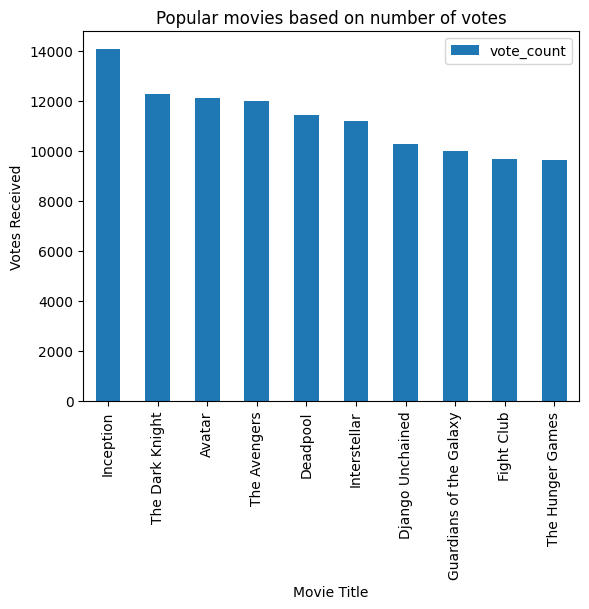

In [47]:
## Movie Title vs Vote count

popular_movies_barchart = barchart_data[['title','vote_count']]

popular_movies_barchart.plot(kind='bar',stacked=False,x='title',y='vote_count',color='tab:blue')

plt.title('Popular movies based on number of votes')
plt.xlabel('Movie Title')
plt.ylabel('Votes Received')
plt.xticks(rotation=90)

plt.show()

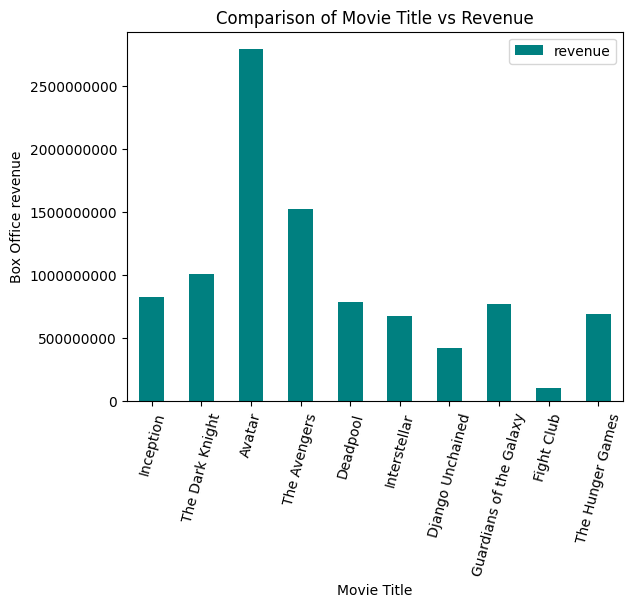

In [48]:
## Movie Title vs Revenue

popular_movies_barchart = barchart_data[['title','revenue']]

popular_movies_barchart.plot(kind='bar',stacked=False,x='title',y='revenue',color='teal')

plt.title('Comparison of Movie Title vs Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Box Office revenue')
plt.ticklabel_format(axis="y", style='plain') ##disable sceinctific notation
plt.xticks(rotation=75)

plt.show()

In [49]:
# Number of ratings per user

ratings_per_user = ratings_df.groupby('userId')['rating'].count()
ratings_per_user
barchart_ratings_data = ratings_per_user.sort_values(ascending=False).head(10)
barchart_ratings_data
# fig, ax = plt.subplots()
# ax.hist(barchart_ratings_data, bins=15)
# plt.ylabel("No. of Ratings given")
# plt.ticklabel_format(useOffset=False, style='plain')
# plt.show()

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
Name: rating, dtype: int64

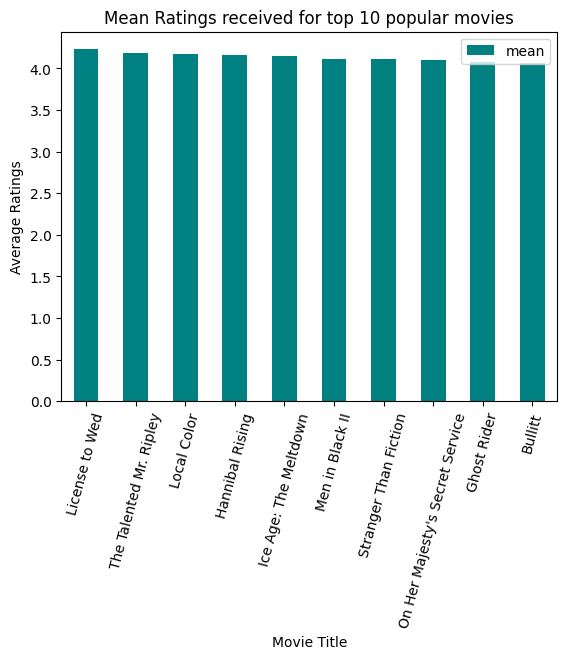

In [50]:
# Number of ratings per movie for top popular 10 movies

movies_ratings_barchart_df = popular_movies_df.merge(ratings_df, left_on="id", right_on="movieId")
# movies_ratings_barchart_df
movies_ratings_barchart_mean = movies_ratings_barchart_df.groupby('original_title')['rating'].agg(['mean']).round(2).reset_index().sort_values("mean",ascending=False)
# movies_ratings_barchart_mean.head(10)

popular_movies_avg_ratings = movies_ratings_barchart_mean[['original_title','mean']].head(10)
popular_movies_avg_ratings.plot(kind='bar',stacked=False,x='original_title',y='mean',color='teal')
plt.title('Mean Ratings received for top 10 popular movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Ratings')
plt.ticklabel_format(axis="y", style='plain') ##disable sceinctific notation
plt.xticks(rotation=75)

plt.show()


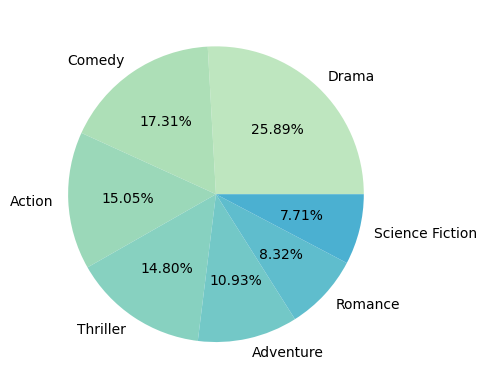

In [51]:
## Pie chart to show top 7 genres with their proportions
df_for_piechart = movies_credits_df_exploded.groupby('genres').size().reset_index(name='No_of_Movies').sort_values(by='No_of_Movies',ascending=False)
top_seven_movies_for_piechart = df_for_piechart.head(7)

cmap = plt.get_cmap('GnBu')
colors = list(cmap(np.linspace(0.30, 0.80, 10)))
fig, ax = plt.subplots()
ax.pie(top_seven_movies_for_piechart['No_of_Movies'], labels=top_seven_movies_for_piechart['genres'],autopct='%.2f%%',colors=colors)
plt.show()

In [52]:
# Hypoyhesis testing between Budget and Revenue
from scipy.stats import spearmanr
rho, p_value = spearmanr(movies_credits_df_x['budget'], movies_credits_df_x['revenue'])

print(f"rho value: {rho}")

print("{0:.4f}".format(p_value))

if p_value < 0.05:
    print("Reject null hypothesis - Revenue distributions differ significantly.")
else:
    print("Fail to reject null hypothesis - Revenue distributions might be similar.")

rho value: 0.769916223852711
0.0000
Reject null hypothesis - Revenue distributions differ significantly.


In [53]:
from scipy.stats import kstest

genres = ['Science Fiction','Romance']

genre_data = {}
for genre in genres:
    genre_data[genre] = movies_credits_df_exploded[movies_credits_df_exploded['genres'] == genre]

for genre1, genre2 in zip(genres[:-1], genres[1:]):
    statistic, pvalue = kstest(genre_data[genre1]['revenue'], genre_data[genre2]['revenue'])
    # Print results with interpretation
    print(f"Revenue distribution in {genre1} vs {genre2}:")
    print(f"Statistic: {statistic}, p-value: {pvalue}")
    if pvalue < 0.05:
       print("Reject null hypothesis - Revenue distributions differ significantly.")
    else:
       print("Fail to reject null hypothesis - Revenue distributions might be similar.")

Revenue distribution in Science Fiction vs Romance:
Statistic: 0.18212573776371996, p-value: 1.4713184862056508e-05
Reject null hypothesis - Revenue distributions differ significantly.


In [63]:

actors = movies_credits_df_exploded['actor'].unique()  # Get unique actor names
counter = 0
actor_data = {}
for actor in actors:
    actor_data[actor] = movies_credits_df_exploded[movies_credits_df_exploded['actor'] == actor]

for actor1, actor2 in zip(actors[:-1], actors[1:]):
    statistic, pvalue = kstest(actor_data[actor1]['revenue'], actor_data[actor2]['revenue'])
    # Print results with interpretation
    print(f"Revenue distribution in {actor1} vs {actor2}:")
    print(f"Statistic: {statistic}, p-value: {pvalue}")
    counter = counter + 1
    if pvalue < 0.05:
      print("Reject null hypothesis - Revenue distributions differ significantly.")
    else:
      print("Fail to reject null hypothesis - Revenue distributions might be similar.")
    if counter == 10:
      break;

Revenue distribution in Tom Hanks vs Pierce Brosnan:
Statistic: 0.3611111111111111, p-value: 0.038560996521148534
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Pierce Brosnan vs Nicolas Cage:
Statistic: 0.33636363636363636, p-value: 0.03413276165752332
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Nicolas Cage vs Brad Pitt:
Statistic: 0.19646464646464645, p-value: 0.3182690040162616
Fail to reject null hypothesis - Revenue distributions might be similar.
Revenue distribution in Brad Pitt vs Stephen Baldwin:
Statistic: 0.7777777777777778, p-value: 0.0004480495569249788
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Stephen Baldwin vs Ice Cube:
Statistic: 0.875, p-value: 0.0024864024864024864
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Ice Cube vs George Clooney:
Statistic: 0.40540540540540543, p-value

In [64]:

directors = movies_credits_df_exploded['director'].unique()  # Get unique director names
counter = 0
director_data = {}
for director in directors:
    director_data[director] = movies_credits_df_exploded[movies_credits_df_exploded['director'] == director]

for director1, director2 in zip(directors[:-1], directors[1:]):
    statistic, pvalue = kstest(director_data[director1]['revenue'], director_data[director2]['revenue'])
    # Print results with interpretation
    print(f"Revenue distribution in {director1} vs {director2}:")
    print(f"Statistic: {statistic}, p-value: {pvalue}")
    counter = counter + 1
    if pvalue < 0.05:
      print("Reject null hypothesis - Revenue distributions differ significantly.")
    else:
      print("Fail to reject null hypothesis - Revenue distributions might be similar.")
    if counter == 10:
      break;

Revenue distribution in John Lasseter vs Martin Campbell:
Statistic: 0.8, p-value: 0.00031082122884518897
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Martin Campbell vs Mike Figgis:
Statistic: 1.0, p-value: 0.014705882352941176
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Mike Figgis vs David Fincher:
Statistic: 1.0, p-value: 0.008658008658008658
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in David Fincher vs Bryan Singer:
Statistic: 0.6, p-value: 0.0022675858650186478
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Bryan Singer vs F. Gary Gray:
Statistic: 0.4153846153846154, p-value: 0.13121032547267572
Fail to reject null hypothesis - Revenue distributions might be similar.
Revenue distribution in F. Gary Gray vs Robert Rodriguez:
Statistic: 0.5384615384615384, p-value: 0.04920520319631909
Reject nu

In [66]:
actors = movies_credits_df_exploded['actor'].unique()  # Get unique actor names
counter = 0
actor_data = {}
for actor in actors:
    actor_data[actor] = movies_credits_df_exploded[movies_credits_df_exploded['actor'] == actor]

for actor1, actor2 in zip(actors[:-1], actors[1:]):
    statistic, pvalue = kstest(actor_data[actor1]['revenue'], actor_data[actor2]['revenue'])
    # Print results with interpretation
    print(f"Revenue distribution in {actor1} vs {actor2}:")
    print(f"Statistic: {statistic}, p-value: {pvalue}")
    counter = counter + 1
    if pvalue < 0.05:
      print("Reject null hypothesis - Revenue distributions differ significantly.")
    else:
      print("Fail to reject null hypothesis - Revenue distributions might be similar.")
    if counter == 10:
      break;

Revenue distribution in Tom Hanks vs Pierce Brosnan:
Statistic: 0.3611111111111111, p-value: 0.038560996521148534
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Pierce Brosnan vs Nicolas Cage:
Statistic: 0.33636363636363636, p-value: 0.03413276165752332
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Nicolas Cage vs Brad Pitt:
Statistic: 0.19646464646464645, p-value: 0.3182690040162616
Fail to reject null hypothesis - Revenue distributions might be similar.
Revenue distribution in Brad Pitt vs Stephen Baldwin:
Statistic: 0.7777777777777778, p-value: 0.0004480495569249788
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Stephen Baldwin vs Ice Cube:
Statistic: 0.875, p-value: 0.0024864024864024864
Reject null hypothesis - Revenue distributions differ significantly.
Revenue distribution in Ice Cube vs George Clooney:
Statistic: 0.40540540540540543, p-value

In [68]:

import statsmodels.formula.api as smf

## Marry up movies_credit exploded data with movies_mean rating data
movies_ratings_df_exploded = movies_credits_df_exploded.merge(movies_ratings_mean, left_on="original_title", right_on="original_title")

movies_ratings_df_exploded_x = movies_ratings_df_exploded[['genres','actor','director','mean']].head(1000)

colnames = ['genres','actor','director']

ols_mod = smf.ols(formula="mean ~ genres + actor + director", data=movies_ratings_df_exploded_x,missing="drop")

ols_result =  ols_mod.fit()

print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     24.98
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          6.92e-243
Time:                        12:34:27   Log-Likelihood:                 572.53
No. Observations:                1000   AIC:                            -427.1
Df Residuals:                     641   BIC:                             1335.
Df Model:                         358                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [58]:
## Content based filtering
## Import necessary modules

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

## Load keywords data frame
keywords_df = pd.read_csv("C:\\Sidd\\VS Code\\archive\\keywords.csv", header=0) ## creating keywords data frame

keywords_df["id"] = keywords_df["id"].astype(int)

## Create a new data frame by merging id's from Keywords and movies credits dataset
movies_n_keywords_total_df = movies_credits_df_x.merge(keywords_df, left_on="id", right_on="id")

# print(movies_n_keywords_total_df['title','keywords'].head(40))

## Create a new data frame selecting only Genres, Actor, Director and Keywords
movies_n_keywords = movies_n_keywords_total_df[['genres','actor','director','keywords','overview']]


In [87]:
movies_n_keywords_transform = movies_n_keywords.copy()
## Transform the genres and keywords into list from JSON type string values
movies_n_keywords_transform['genres'] = movies_n_keywords['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies_n_keywords_transform['keywords'] = movies_n_keywords['keywords'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies_n_keywords_transform.head(4)

,genres,actor,director,keywords,overview
0,"[Animation, Comedy, Family]",Tom Hanks,John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ..."
1,"[Adventure, Action, Thriller]",Pierce Brosnan,Martin Campbell,"[cuba, falsely accused, secret identity, compu...",James Bond must unmask the mysterious head of ...
2,"[Drama, Romance]",Nicolas Cage,Mike Figgis,"[individual, prostitute, alcohol, casino, love...","Ben Sanderson, an alcoholic Hollywood screenwr..."
3,"[Crime, Mystery, Thriller]",Brad Pitt,David Fincher,"[self-fulfilling prophecy, detective, s.w.a.t....",Two homicide detectives are on a desperate hun...


In [250]:
vector_var = CountVectorizer(stop_words='english')  ## using Countvectorizer here instead of TFIDF
import re
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() ## Stemming is important
column_names = ['actor', 'keywords', 'director', 'genres','overview']

movies_n_keywords_transform = movies_n_keywords_transform.dropna()

## Lower case is important
# Code referred from https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

def convert_lower_case(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for colname in column_names:
    movies_n_keywords_transform[colname] = movies_n_keywords_transform[colname].apply(convert_lower_case)

movies_n_keywords_transform['overview'] = movies_n_keywords_transform['overview'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

def create_final_token(x):    
    return ' '.join(x['keywords']) + ' ' + x['actor'] + ' ' + x['director'] + ' ' + ' '.join(x['genres']) + ' ' +  re.sub(r'[^a-zA-Z0-9]', ' ', str(x['overview']))
movies_n_keywords_transform['final_string'] = movies_n_keywords_transform.apply(create_final_token,axis=1)

vecor_var_transform = vector_var.fit_transform(movies_n_keywords_transform['final_string'])

## Usinig cosine similarity
cosine_sim = linear_kernel(vecor_var_transform,vecor_var_transform)

def recommend_movies(movie_title, num_recommendations=10):
  # Get the index of the target movie
  target_movie_index = movies_credits_df_x[movies_credits_df_x['title'] == movie_title].index.values[0]

  # Sort movies based on similarity (descending order)
  sorted_similar_movies = sorted(enumerate(cosine_sim[target_movie_index]), key=lambda item: -item[1])

  # Recommend top N similar movies (excluding the target movie itself)
  recommendations = [movies_credits_df_x.loc[i[0], 'title'] for i in sorted_similar_movies[1:num_recommendations+1]]
  
  return recommendations

movie_to_recommend_from = "The Godfather"
recommendations = recommend_movies(movie_to_recommend_from)

print(f"Recommendations for:: {movie_to_recommend_from}:")
for movie in recommendations:
  print(movie)



Recommendations for:: The Godfather:
The Godfather: Part III
GoodFellas
The Island
The Talented Mr. Ripley
Royal Space Force - The Wings Of Honneamise
Cannibal! The Musical
Downfall
Little Children
The Mist
Jodhaa Akbar


In [510]:
## Item-Item Collaborative filtering to recommend movies based on users liked movies.

## Using smaller ratings dataset ratings_small.csv due to resource constraint

ratings_small_df = pd.read_csv("C:\\Sidd\\VS Code\\archive\\ratings_small.csv", header=0) ##creating ratings data frame
## joining movies data set with ratings data set to get movie title
movies_ratings_small_df = movies_df.merge(ratings_small_df, left_on="id", right_on="movieId")
## select movie id, title , user id and ratings
ratings_small_df_attr = movies_ratings_small_df[['movieId','title','userId','rating']]
## pivot_table function creates a matrix based on "index" and "columns" mentioned in the function's 
## parameters. The values of each row, column are values. In this scenarion, they are value of "ratings"
user_movie_df = ratings_small_df_attr.pivot_table(index="title", columns="userId", values="rating")
user_movie_df.head(4)


userId,2,3,4,5,6,7,8,9,10,11,...,661,662,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21 Grams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [563]:
## Using concept of normalized cosine similarity based on published literature to write 
## item-item Collaborative filtering method

##Movie Recommender Systems: Implementation and Performance Evaluation

##Saadati, M., Shihab, S., & Rahman, M. S. (2019). Movie Recommender Systems: Implementation and Performance Evaluation.

##http://arxiv.org/abs/1909.12749

## Saadati, M., Shihab, S., & Rahman, M. S. (2019, p. 2) has recommended to use centralized cosine similarity
## where the ratings are first normalized by subtracting the row means from each row entries, and 
## then the missing rating are treated as 0.


## all non-zeros ratings are first centralized to 0
subtract_mean = lambda row: row - row.mean()
user_movie_df = user_movie_df.apply(subtract_mean,axis=1)

## all NA values are filled with 0
user_movie_df = user_movie_df.fillna(0)
user_movie_df.head(4)

## A function to list users who rated a given movie name
def get_users_list(movie_name):
    temp1 = np.array(user_movie_df.loc[movie_name].values.nonzero())
    temp2 = np.array(temp1[0])
    print(f"Ratings for movies::'{movie_name}'")
    for i in range(len(temp2)):
        print(user_movie_df.loc[movie_name][temp2[i]:][:1])

# This will print the users name
get_users_list('The Godfather')


Ratings for movies::'The Godfather'
userId
53                  -2.00
Name: The Godfather, dtype: float64
userId
182                   1.00
Name: The Godfather, dtype: float64
userId
605                   1.00
Name: The Godfather, dtype: float64


In [575]:
# Calculate similarity matrix
similarity_matrix = cosine_similarity(user_movie_df)
# similarity_matrix = cosine(user_movie_df)

# Fetch index valuen of a given movie name
index = np.where(user_movie_df.index == 'The Godfather')[0][0]
similar_movies = sorted(list(enumerate(similarity_matrix[index])),key=lambda x:x[1], reverse=True)[1:10]

for index,similarity in similar_movies:
    print(user_movie_df.iloc[index].name)

Transamerica
Underworld
The Terminal
Titanic
Cars
Good Will Hunting
The Good, the Bad and the Ugly
The Living Daylights
Star Wars
